# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params= {"q": city, "appid": weather_api_key}
    city_url = requests.get(url, params=params)
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | canutama
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | xinzhi
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | sabang
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | bredasdorp
Processing

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,298.14,78,75,8.23,CC,1690225450
1,canutama,-6.5339,-64.3831,309.41,23,75,1.43,BR,1690225450
2,atafu village,-8.5421,-172.5159,302.13,70,17,7.77,TK,1690225450
3,hawaiian paradise park,19.5933,-154.9731,299.88,88,100,2.57,US,1690225451
4,puerto natales,-51.7236,-72.4875,269.94,76,100,0.73,CL,1690225347


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")


#convert the temperature from Kelvin to Celcius
city_data_df['Max Temp'] -=273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,24.99,78,75,8.23,CC,1690225450
1,canutama,-6.5339,-64.3831,36.26,23,75,1.43,BR,1690225450
2,atafu village,-8.5421,-172.5159,28.98,70,17,7.77,TK,1690225450
3,hawaiian paradise park,19.5933,-154.9731,26.73,88,100,2.57,US,1690225451
4,puerto natales,-51.7236,-72.4875,-3.21,76,100,0.73,CL,1690225347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

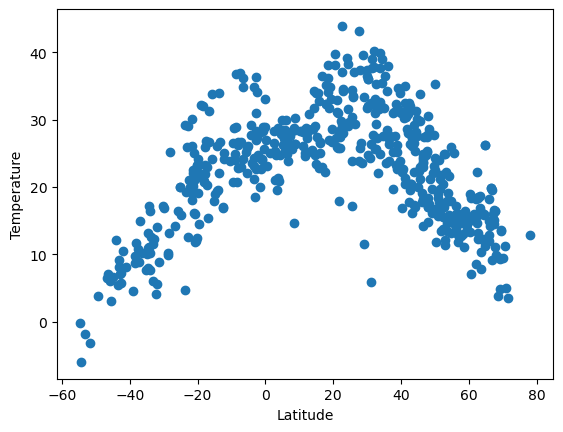

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

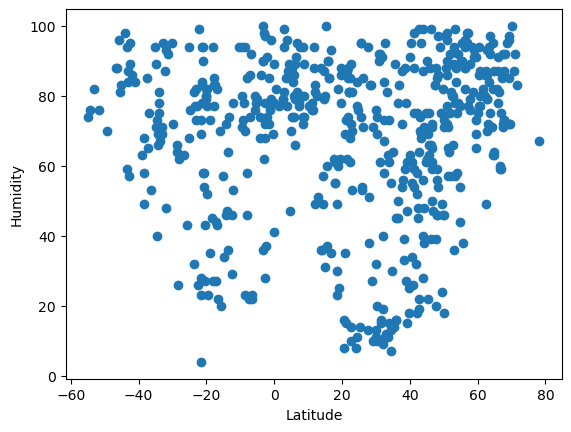

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

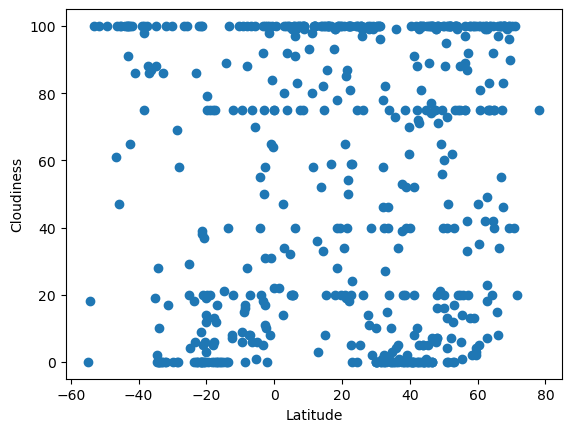

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

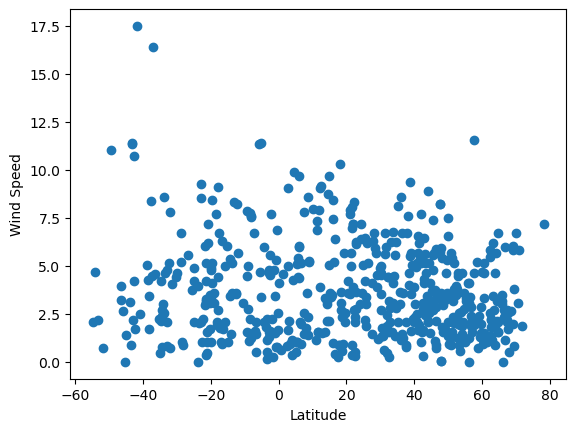

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def relationship (x_values,y_values,title, xlabel, ylabel,ann_coords,r_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Build the scatter plots for latitude vs. wind speed

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,color="red")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.annotate("r-value: " +str(rvalue), r_coords, fontsize=8)
    plt.annotate(line_eq,ann_coords,fontsize=12,color="red")
    plt.show()

    print(f'p-value: {pvalue}')
  


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hawaiian paradise park,19.5933,-154.9731,26.73,88,100,2.57,US,1690225451
6,jamestown,42.0970,-79.2353,28.07,58,0,5.14,US,1690225206
7,xinzhi,36.4989,111.7047,27.10,50,5,1.47,CN,1690225452
8,lihue,21.9789,-159.3672,25.81,81,18,3.90,US,1690225224
9,albany,42.6001,-73.9662,26.46,64,71,2.78,US,1690225002


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,24.99,78,75,8.23,CC,1690225450
1,canutama,-6.5339,-64.3831,36.26,23,75,1.43,BR,1690225450
2,atafu village,-8.5421,-172.5159,28.98,70,17,7.77,TK,1690225450
4,puerto natales,-51.7236,-72.4875,-3.21,76,100,0.73,CL,1690225347
5,grytviken,-54.2811,-36.5092,-5.98,76,18,4.69,GS,1690225452


###  Temperature vs. Latitude Linear Regression Plot

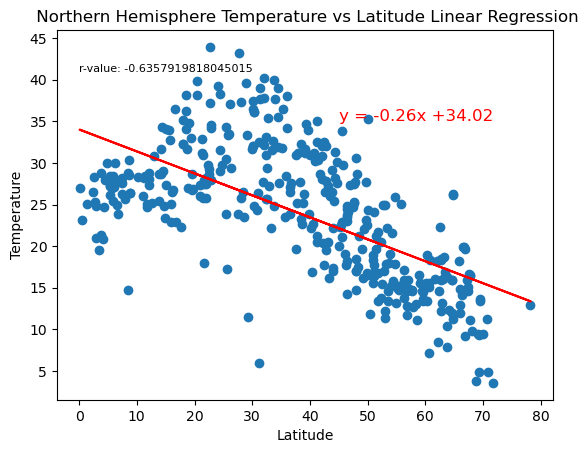

p-value: 5.400715327444003e-45


In [19]:
# Linear regression on Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Max Temp']," Northern Hemisphere Temperature vs Latitude Linear Regression", "Latitude", "Temperature",(45,35),(0,41))
    

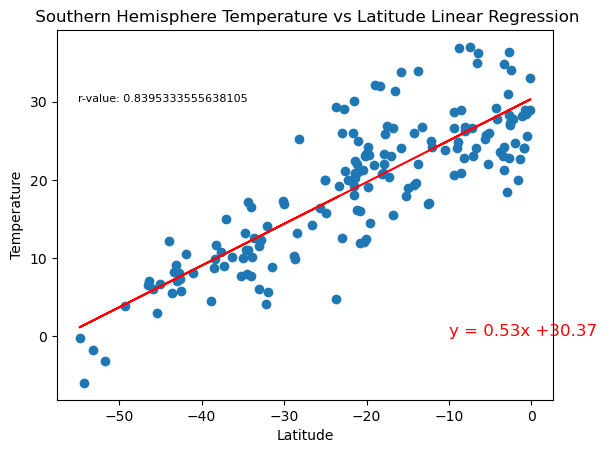

p-value: 2.60800915405819e-45


In [20]:
# Linear regression on Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Max Temp']," Southern Hemisphere Temperature vs Latitude Linear Regression", "Latitude", "Temperature",(-10,0),(-55,30))

**Discussion about the linear relationship:** For both the northern and the southern hemisphere, we see a correlation between the latitude 
and temperature in a given city. The results are suggesting that the farther you are from the equator, the colder the temperature is. Our southern hemisphere cities  that were selected are proposing a stronger correlation then we are seeing in the north, however, the pvalue for both data sets is suggesting that this may be a coincidence since the pvalue is less than 0.05.

### Humidity vs. Latitude Linear Regression Plot

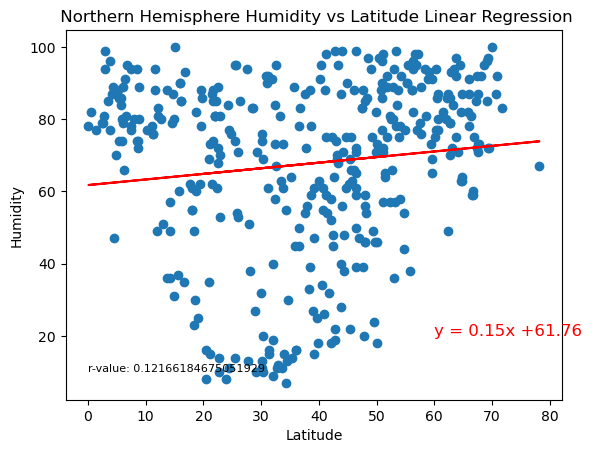

p-value: 0.01692681023126518


In [21]:
# Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Humidity']," Northern Hemisphere Humidity vs Latitude Linear Regression", "Latitude", "Humidity",(60,20),(0,10))

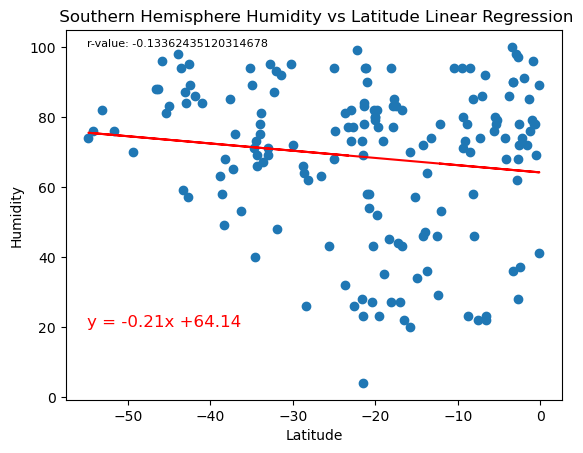

p-value: 0.0861024419955969


In [22]:
# Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Humidity']," Southern Hemisphere Humidity vs Latitude Linear Regression", "Latitude", "Humidity",(-55,20),(-55,100))

**Discussion about the linear relationship:** The correlation between the data points is suggesting to us that there is no correlation between a cities latitude and the humidity that the city experiences. The northern hemisphere has an rvalue of .12, a fairly weak correlation and our pvalue of .01 suggests that there is enough statistical evidence to reject the null hypothesis. This is the same in the opposite direction. For the southern hemisphere with an absolute value of .13 for an rvalue, however, our pvalue of 0.08 suggests that there is not enough evidence to reject any relationship. We conclude that there is not a strong relationship between these two variables.

### Cloudiness vs. Latitude Linear Regression Plot

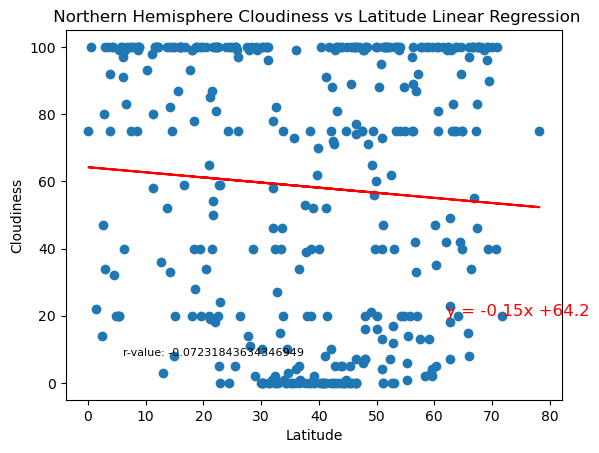

p-value: 0.15670784729093043


In [23]:
# Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness']," Northern Hemisphere Cloudiness vs Latitude Linear Regression", "Latitude", "Cloudiness",(62,20),(6,8))

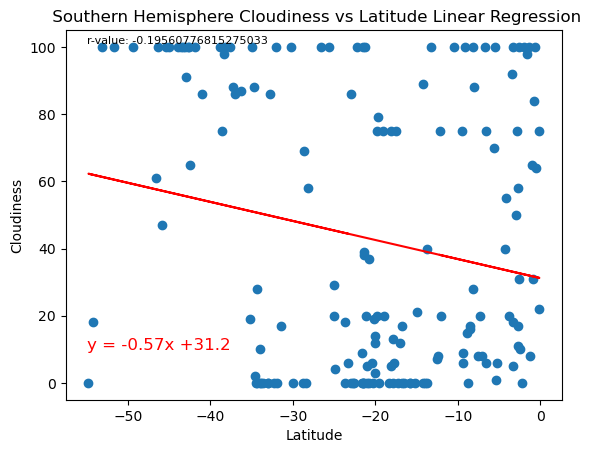

p-value: 0.011549008220523503


In [24]:
# Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness']," Southern Hemisphere Cloudiness vs Latitude Linear Regression", "Latitude", "Cloudiness",(-55,10),(-55,101))

**Discussion about the linear relationship:** The data collected on different cities cloudiness verse latitude suggests that there is little evidence to suggest latitude has any effect on how cloudy a city is. There may be a weak correlation noticed in the above graphs that almost seems contradicting. The northern hemishpere data is showing that the farther you are from the equator, the less cloudy it is, except the southern hemisphere is showing the opposite. The closer you are to the equator, the less cloudy it is. Using the pvalues to help us reject the null hypothesis we can see that in the southern hemisphere we have enough evidence to reject the idea that there are less clouds the closer you are to the  data. This does not allow us to conclude any other theories of this relationship but rather suggests that the sample provided can not be used to show statistical significance around the relationship.

### Wind Speed vs. Latitude Linear Regression Plot

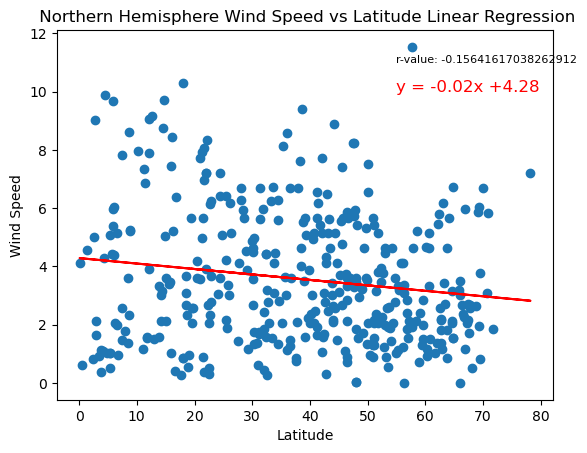

p-value: 0.0020832864690371418


In [26]:
# Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed']," Northern Hemisphere Wind Speed vs Latitude Linear Regression", "Latitude", "Wind Speed",(55,10),(55,11))

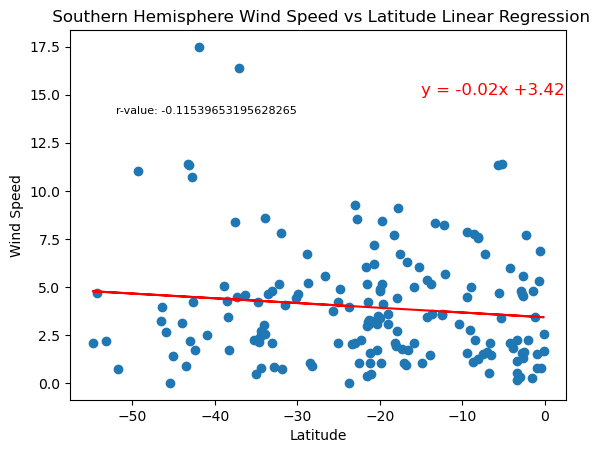

p-value: 0.13874088517312205


In [27]:
# Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed']," Southern Hemisphere Wind Speed vs Latitude Linear Regression", "Latitude", "Wind Speed",(-15,15),(-52,14))

**Discussion about the linear relationship:** In the last two plots, we are analyzing the relationship between wind speed and latitude. In the northern hemisphere we see a weak correlation, suggesting a lower wind speed the farther away you are from the equator. In the southern hemisphere we notice a similar pattern with correlation in the opposite direction. The pvalue in both cases help us to determine that there is not statistical significance around rejecting any hypotheses for this data. We can conclude that there is not enough evidence in the southern hemisphere data to reject the null hypothesis and there is enough significance around the northern hemisphere data to conclude that being further away from the equator does not directly impact the wind speed. 